# Python for Finance: Simple vs Log Returns and Normality Assumptions

understand the difference between simple returns and log returns.

We also talk about normality of financial data!

## THE MAIN REASON

### If we want to model returns using the normal distribution!

- SIMPLE RETURNS: The product of normally distributed variables is NOT normally distributed

- LOG RETURNS: The sum of normally distributed variables DOES follow a normal distribution

Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality.

In [4]:
## This is required for pandas_datareader on google colab - then you need to restart runtime
!pip install yfinance
#!pip install yfinance

#### Step 1: Import dependencies

In [5]:
import datetime as dt
import pandas as pd
import numpy as np
import pylab
import seaborn as sns
import scipy.stats as stats
from pandas_datareader import data as pdr
import plotly.offline as pyo
import yfinance as yf
yf.pdr_override()
pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

#### Step 2: get stock market data
Choose a date range and select stock to chart.

In [6]:
end = dt.datetime.now()
start = dt.datetime(2010,1,1)

df = yf.download('AAPL', start, end)
df.head()
df_1=yf.download('s&P')

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478999,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490201,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375156,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


### Part 1: Simple vs Log Returns

Firstly one period simple returns

$R_t = \frac{P_t - P_{t-1}}{P_{t-1}} = \frac{P_t}{P_{t-1}} - 1$

$1 + R_t = \frac{P_t}{P_{t-1}}$

Calculate Daily Simple Returns

In [7]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
2010-01-11   -0.008821
                ...   
2024-01-17   -0.005174
2024-01-18    0.032571
2024-01-19    0.015533
2024-01-22    0.012163
2024-01-23    0.006653
Name: Close, Length: 3536, dtype: float64

For multi-period k returns

$1 + R_t(k) = \frac{P_t}{P_{t-1}}\frac{P_{t-1}}{P_{t-2}}...\frac{P_{t-k+1}}{P_{t-k}} = \frac{P_t}{P_{t-k}}$

$1 + R_t(k) = (1 + R_t)(1 + R_{t-1})...(1 + R_{t-k+1})$

$1 + R_t(k) = \prod_{i=0}^{k-1} (1 + R_{t-i})$

Plot financial data and look at first and last share prices

In [8]:
df.Close.plot().update_layout(autosize=False,width=500,height=300).show(renderer="colab")

In [9]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 7.643214225769043 Last 195.17999267578125


/tmp/ipykernel_13578/223727047.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Use simple returns & attempt to compute final price from starting price over time horizon

In [10]:
simple_returns.mean()

0.0010746431287240981

In [11]:
df.Close[0]*(1+simple_returns.mean())**len(simple_returns)

/tmp/ipykernel_13578/231269505.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



340.9432363070046

In [12]:
df.Close[0]*np.prod([(1+Rt) for Rt in simple_returns])

/tmp/ipykernel_13578/3150262643.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



195.1799926757819

#### Log Returns

Now onto one period log returns:

$r_t = \ln(1+R_t)$

K-period log returns:

$r_t(k) = \ln(1+R_t(k)) = \ln[(1+R_t)(1+R_{t-1})...(1+R_{t-k+1})]$

$r_t(k) = \ln(1+R_t(k)) = \ln(1+R_t) + \ln(1+R_{t-1}) + ... + \ln(1+R_{t-k+1})$

$r_t(k) = \ln(1+R_t(k)) = r_t + r_{t-1} + ... + r_{t-k+1} = \ln(P_t) - \ln(P_{t-k})$

Compute log returns in python

In [13]:
log_returns = np.log(df.Close / df.Close.shift(1)).dropna()
log_returns

Date
2010-01-05    0.001727
2010-01-06   -0.016034
2010-01-07   -0.001850
2010-01-08    0.006626
2010-01-11   -0.008861
                ...   
2024-01-17   -0.005187
2024-01-18    0.032052
2024-01-19    0.015414
2024-01-22    0.012090
2024-01-23    0.006631
Name: Close, Length: 3536, dtype: float64

In [14]:
log_returns.mean()

0.0009163189896221579

In [15]:
df.Close[0] * np.exp(len(log_returns) * log_returns.mean())

/tmp/ipykernel_13578/2644986260.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



195.1799926757818

## AGAIN, THE MAIN REASON

### If we want to model returns using the normal distribution!

- SIMPLE RETURNS: The product of normally distribution variables is NOT normally distributed

- LOG RETURNS: The sum of normally distributed variables follows a normal distribution

Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality.

#### Histogram of log returns

In [16]:
log_returns.plot(kind='hist').update_layout(autosize=False,width=500,height=300).show(renderer="colab")

### Is normality a good assumption for financial data?

The assumption that prices or more accurately log returns are normally distributed!

In [17]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

std_worst = (worst - log_returns.mean())/log_returns.std()
std_best = (best - log_returns.mean())/log_returns.std()
print('Assuming price is normally distributed: ')
print(' Standard dev. worst %.2f and best %.2f' %(std_worst, std_best))
print(' Probability of worst %.13f and best %.13f' %(stats.norm(0, 1).pdf(std_worst), stats.norm(0, 1).pdf(std_best)))

Assuming price is normally distributed: 
 Standard dev. worst -7.80 and best 6.31
 Probability of worst 0.0000000000000 and best 0.0000000008791


### Part 2: Testing for Normality
https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

#### Q-Q or Quantile-Quantile Plots
It plots two sets of quantiles against one another i.e. theoretical quantiles against the actual quantiles of the variable.

Q-Q Plot


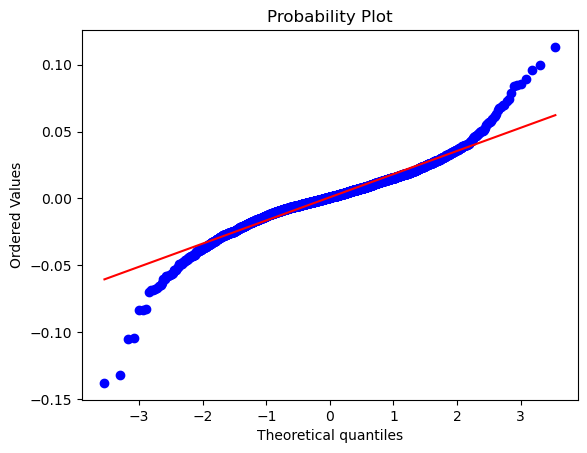

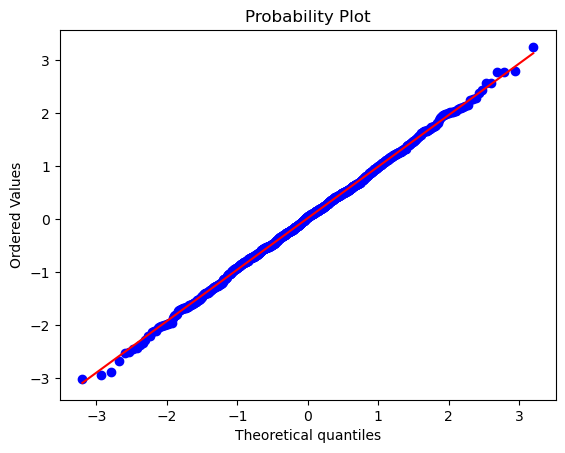

Q-Q Plot


In [18]:
stats.probplot(log_returns, dist='norm', plot=pylab)
print('Q-Q Plot')


import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

log_returns_1 = np.random.normal(0, 1, 1000)

# probplot 
fig = plt.figure()
ax = fig.add_subplot(111)
res = stats.probplot(log_returns_1, dist='norm', plot=ax)
plt.show()

print('Q-Q Plot')




#### Box Plots
Box Plot also know as a box and whisker plot is another way to visualize the normality of a variable. It displays the distribution of data based on a five-number summary i.e. minimum, first quartile (Q1), median (Q2), third quartile (Q3) and maximum.

In [19]:
log_returns.plot(kind = 'box').update_layout(autosize=False,width=350,height=500).show(renderer="colab")

## Hypothesis Testing / Statistical Inference ?

Why would you do it - Can give a more objective answer!

#### Kolmogorov Smirnov test

The Kolmogorov Smirnov test computes the distances between the empirical distribution and the theoretical distribution and defines the test statistic as the supremum of the set of those distances.

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true.
If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis:

The advantage of this is that the same approach can be used for comparing any distribution, not necessary the normal distribution only.

- Do not forget to assign arguments mean and standard deviation! (this was reminded by a subscriber - thanks)

In [20]:
ks_statistic, p_value = stats.kstest(log_returns, 'norm', args = (log_returns.mean(), log_returns.std()))
print(ks_statistic, p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

0.07050293421363221 9.956071542217818e-16
Probably not Gaussian


#### Shapiro Wilk test
The Shapiro Wilk test is the most powerful test when testing for a normal distribution. It has been developed specifically for the normal distribution and it cannot be used for testing against other distributions like for example the KS test.

In [21]:
sw_stat, p = stats.shapiro(log_returns)
print('stat=%.3f, p=%.3f' % (sw_stat, p))
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.946, p=0.000
Probably not Gaussian
